In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


<li>Observe the data and see if you can recognise missing values or 'garbage' values in the data </li>
<li>Data type of missing values don't necessarily have to be np.nan</li>
<li>Based on the context we often decide what should be a missing value and what qualifies as valid data</li>

# Dealing with Duplicates in your data

In [3]:
print(len(data))
dupes = data.duplicated()
print(sum(dupes))
data = data.drop_duplicates()
print(len(data))

31
13
18


# Dealing with Missing Values in your data

`Standard Missing Values`

In [4]:
# Going back to our original dataset, let’s take a look at the “Number” column

pd.DataFrame({'Value': data['Number'], 'Missing?': data['Number'].isnull()})
# isnull() returns true only of there is NaN, it doesn't consider anyother value as null even if the data has garbase value

,Value,Missing?
0,123456.0,False
1,54321.0,False
2,87654.0,False
3,3456.0,False
4,7654.0,False
5,NaN,True
6,87654.0,False
7,6789.0,False
8,NaN,True
9,4567.0,False


`Non-Standard Missing Values`

In [5]:
pd.DataFrame({'Value': data['Shape Reported'], 'Missing?': data['Shape Reported'].isnull()})

# Here 12, @, ??? ..etc are not valid values, still isnull() consider them as not missing information

,Value,Missing?
0,TRIANGLE,False
1,NaN,True
2,OVAL,False
3,DISK,False
4,LIGHT,False
5,NaN,True
6,CIRCLE,False
7,DISK,False
8,12,False
9,CYLINDER,False


In [6]:
pd.DataFrame({'value': data['State'], 'Missing?': data['State'].isnull()})

,value,Missing?
0,NY,False
1,NJ,False
2,CO,False
3,KS,False
4,NY,False
5,N,False
6,CA,False
7,MI,False
8,AK,False
9,NaN,True


<li>Because all the fields are names of states, 5th element and 12th element can be considered as garbage values</li>

In [7]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Number,3
City,0
Colors Reported,9
Shape Reported,2
State,1
Time,0


In [8]:
data.isnull().values.any()   # Any of the values in the dataframe is a missing value

True

In [9]:
data.isnull().sum().sum()  # Total number of recognised missing values

15

# Replacing Missing Values

There are many ways in which missing values can be replaced by different values which is often called as <b>imputing missing </b> values. It depends on your data and the problem you are trying to solve. In the below cell different types of missing value imputations are shown`

In [10]:
# Replacing NaN with a custom value
data['Number'].fillna(12345, inplace = True)   

# Replace NaN values with the mean of the column
# data['Number'].fillna(data.Number.mean(), inplace = True)  

# Replace NaN values with the median of the column
# data['Number'].fillna(data.Number.median(), inplace = True)  

data

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,12345.0,Valley City,NaN,NaN,N,9/15/1934 15:30
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
7,6789.0,Alma,NaN,DISK,MI,7/15/1936 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
9,4567.0,Hubbard,red,CYLINDER,NaN,6/15/1937 0:00


# Location based replacement

In [11]:
data.loc[2, 'Number'] = 2468
data

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,2468.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,12345.0,Valley City,NaN,NaN,N,9/15/1934 15:30
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
7,6789.0,Alma,NaN,DISK,MI,7/15/1936 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
9,4567.0,Hubbard,red,CYLINDER,NaN,6/15/1937 0:00


# Droping Rows with Missing Values

In [12]:
data.dropna(inplace=True)
data.isnull().sum()

Number             0
City               0
Colors Reported    0
Shape Reported     0
State              0
Time               0
dtype: int64

<li>Getting rid of rows with missing values is the easiest way of dealing with their presence</li>
<li>But the downside is that we lose valid data from other columns which do not have missing values for that particular row</li>

# Dealing with incorrect or unwanted observations

In [13]:
data.tail()

,Number,City,Colors Reported,Shape Reported,State,Time
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


`Here we see some invalid data like ???, @, ***, we need to look for such values manually sometime and we can also use summary stats or plots to find such values`

# These values can be modified based on the problem we are trying to solve and what is required for our case

`Here we can say that ** value can be replaced by null or most common color value and @ is also like a null value which can be imputed based on the methods shown above`

# Dealing with Outliers

# About DataSet :

`We will be using Boston House Pricing Dataset which is included in the sklearn dataset API. We will load the dataset and separate out the features and targets.`

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [15]:
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Discover outliers with visualization tools

<i><b>Box Plot</b></i>

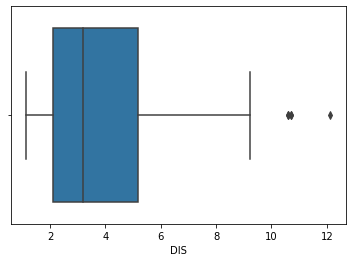

In [16]:
sns.boxplot(boston_data['DIS']);

<b>Note:</b> Above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

# Scatter Plot

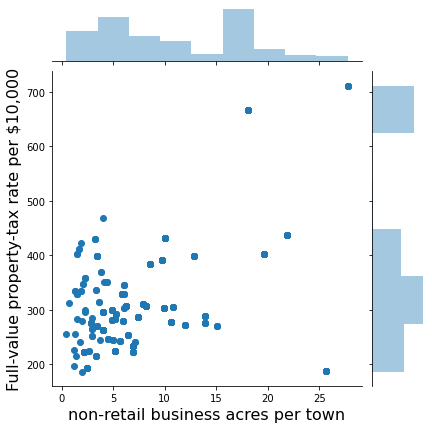

In [17]:
sns.jointplot(boston_data['INDUS'], boston_data['TAX']).set_axis_labels('non-retail business acres per town', 'Full-value property-tax rate per $10,000', fontsize=16);

`If we look at the scatter plot, we have outliers far most right corner.`

# Discover outliers with statistical rules

# Z-Score

In [18]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
# z = np.abs(standardScaler.fit_transform(boston_data)) # to get the z-score of every value with respect to their columns
z = standardScaler.fit_transform(boston_data)
z

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

<b>Note:</b> Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [19]:
negative_threashold=-3
positive_threashold=3
outliers = np.where((z>positive_threashold) | (z < negative_threashold)) # np.where gives a tuple with the  row and column arrays that matche the rule
outliers

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [20]:
z[55][1], z[102][12] # 55th row of column ZN is an upper bound outlier where as 102 row of the column LSTAT is a lower end outlier

(3.375038763517309, -0.2835804285092062)

In [21]:
for indx, val in np.ndenumerate(outliers[0]):
    print(boston_data.iloc[outliers[0][indx[0]], outliers[1][indx[0]]])

90.0
85.0
100.0
70.8
34.41
1.0
1.0
1.0
1.0
1.0
1.0
1.0
95.0
95.0
82.5
82.5
95.0
95.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
8.725
1.0
1.0
90.0
8.704
8.398
1.0
1.0
1.0
1.0
1.0
1.0
90.0
1.0
90.0
85.0
10.7103
10.7103
90.0
12.1265
10.5857
10.5857
1.0
1.0
1.0
1.0
1.0
8.78
3.561
3.863
1.0
1.0
1.0
34.77
4.138
37.97
88.9762
38.3518
41.5292
67.9208
4.138
51.1358
2.6
35.05
28.79
34.37
45.7461
36.98
27.25
21.57
73.5341
16.45
48.45
2.52
3.65
7.68
24.65
37.6619
18.82
60.72
81.33
27.49
9.32
68.95
43.06
0.32
6.68
50.92
10.48
3.5
22.01


# IQR -

In [22]:
Q1 = boston_data.quantile(0.25)
Q3 = boston_data.quantile(0.75)
IQR = Q3 - Q1
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

In [76]:
np.where((boston_data < Q1 - 1.5 * IQR) | (boston_data > Q3 + 1.5 * IQR))

(array([ 18,  25,  27,  32,  34,  39,  40,  54,  55,  56,  57,  65,  66,
         97,  98, 102, 118, 134, 141, 142, 145, 146, 151, 152, 152, 153,
        154, 154, 155, 155, 156, 160, 160, 162, 162, 163, 163, 165, 166,
        167, 168, 169, 170, 180, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 195, 196, 196, 197, 197, 198, 198, 199, 200, 201, 202,
        203, 203, 204, 204, 208, 209, 210, 211, 212, 216, 218, 219, 220,
        221, 222, 224, 225, 226, 232, 233, 234, 236, 253, 254, 255, 256,
        257, 257, 258, 259, 260, 261, 262, 262, 263, 264, 265, 266, 267,
        267, 268, 269, 273, 274, 274, 275, 276, 276, 277, 277, 278, 280,
        282, 283, 283, 283, 284, 285, 286, 286, 287, 288, 289, 290, 291,
        292, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 331, 332,
        341, 343, 344, 347, 348, 349, 350, 351, 351, 352, 352, 353, 353,
        354, 354, 355, 355, 356, 357, 358, 363, 364, 364, 365, 366, 367,
        367, 367, 369, 370, 371, 372, 373, 373, 374

` So far we identified the outliers from the data, we need impute/correct them`

# Working with Outliers: Correcting, Removing


# 1. Z-Score

In [77]:
boston_df1 = boston_data[(z < 3).all(axis=1)]    # Select only the rows without a single outlier
boston_df1.shape, boston_data.shape

((439, 13), (506, 13))

In [91]:
boston_df2 = boston_data.copy()
print(boston_df2.tail())
#Replace all the outliers with median values. This will create new some outliers but, we will ignore them
for i, j in zip(outliers[0], outliers[1]): #The zip() function returns a zip object, which is an iterator of tuples 
#where the first item in each passed iterator is paired together, and then the second item in each passed iterator are 
#paired together etc.
    boston_df2.iloc[i, j] = boston_df2[boston_data.columns[j]].median() # imputing outliers with the median values
print(boston_df2)

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   


In [92]:
z = standardScaler.fit_transform(boston_df2)
np.where((z < negative_threashold) | (z > positive_threashold))

(array([ 39,  40,  54,  65,  66, 145, 146, 155, 156, 163, 195, 196, 197,
        198, 224, 232, 233, 253, 254, 255, 267, 286, 290, 291, 292, 298,
        299, 300, 348, 354, 355, 367, 374, 375, 378, 384, 384, 386, 387,
        400, 403, 406, 409, 412, 413, 413, 414, 415, 417, 417, 428, 430,
        432, 433, 434, 435, 438, 440]),
 array([ 1,  1,  1,  1,  1, 11, 11, 11, 11,  5,  1,  1,  1,  1,  5,  5,  5,
         5,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11,  0,  0,
         0,  0,  5,  0,  0,  0,  0,  0, 11,  0,  0, 11, 11,  0,  0, 11, 11,
        11, 11, 11, 11, 11, 12,  0]))

# 2. IQR Score

`Just like Z-score we can use previously calculated IQR score to filter out the outliers by keeping only valid values.`

In [93]:
non_outliers = boston_data[~((boston_data < (Q1 - 1.5 * IQR)) |(boston_data > (Q3 + 1.5 * IQR))).any(axis=1)]
# rows without outliers

non_outliers.shape

(274, 13)

In [106]:
boston_data_copy = boston_data.copy()
print(len(np.where((boston_data_copy < (Q1 - 1.5 * IQR)) | (boston_data_copy > (Q3 + 1.5 * IQR)))[0]))
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(boston_data_copy < (Q1 - 1.5 * IQR))[0], np.where(boston_data_copy < (Q1 - 1.5 * IQR))[1]):
    wisker = Q1 - 1.5 * IQR
    boston_data_copy.iloc[i, j] = wisker[j]

# Replace every outlier on the upper side by the upper whisker
for i, j in zip(np.where(boston_data_copy < (Q3 + 1.5 * IQR))[0], np.where(boston_data_copy < (Q3 + 1.5 * IQR))[1]):
    wisker = Q3 + 1.5 * IQR
    boston_data_copy.iloc[i, j] = wisker[j]

len(np.where((boston_data_copy < (Q1 - 1.5 * IQR)) | (boston_data_copy > (Q3 + 1.5 * IQR)))[0])

303


203